In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv("IRIS.csv")
data = pd.DataFrame(data)

train = data.iloc[:,0:4]
test = data.iloc[:,4:5]

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.20, random_state=20)

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Model Fit 

In [3]:
from sklearn.linear_model import LogisticRegression

logisticReg = LogisticRegression()
logisticReg.fit(x_train, y_train)

y_pred = logisticReg.predict(x_test)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor']


#### Confusion Matrix & Accuracy Score

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [5]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 8  0  0]
 [ 0 11  0]
 [ 0  2  9]]


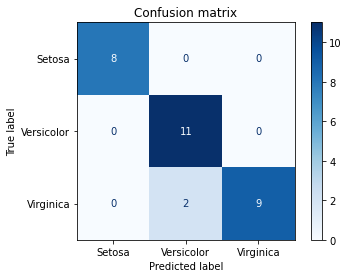

In [6]:
from sklearn.metrics import plot_confusion_matrix

class_names = ["Setosa","Versicolor","Virginica"]

titles_options = [("Confusion matrix", None)]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(logisticReg, x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
plt.show()


In [7]:
acc_score =  accuracy_score(y_test, y_pred)
print('Accuracy Score: ',acc_score)

Accuracy Score:  0.9333333333333333


## Model Tuned

In [8]:
logisticReg_params = {"max_iter": [1,10,20,30,40,50,100],
                        "multi_class": ['auto', 'ovr', 'multinomial'],
                        "C":np.arange(1,10,1),
                     "solver":['liblinear', 'sag']}

In [9]:
from sklearn.model_selection import GridSearchCV

logisticReg_model = GridSearchCV(logisticReg, logisticReg_params, cv=10)
logisticReg_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_iter': [1, 10, 20, 30, 40, 50, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['liblinear', 'sag']})

#### Best Parameters

In [10]:
print("Best Parameter: ", logisticReg_model.best_params_)

Best Parameter:  {'C': 1, 'max_iter': 20, 'multi_class': 'auto', 'solver': 'sag'}


#### Model Fit wit Best Parameters

In [11]:
from sklearn.linear_model import LogisticRegression

logisticReg_tuned = LogisticRegression(C = 1, max_iter = 20, multi_class = 'auto', solver='sag')
logisticReg_tuned.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=20, solver='sag')

#### Predict Y

In [12]:
y_pred = logisticReg_tuned.predict(x_test)

#### Confusion Matrix & Accuracy Score

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("***********************************")

acc_score =  accuracy_score(y_test, y_pred)
print('Accuracy Score: ', acc_score)

[[ 8  0  0]
 [ 0 11  0]
 [ 0  1 10]]
***********************************
Accuracy Score:  0.9666666666666667
